# The Coastline Evolution Model

Before starting:
    > source /home/csdms/wmt/20-04-2015/bin/activate /home/csdms/wmt/20-04-2015/bin/activate
or
    > module load wmt

In [1]:
%pylab inline
import numpy as np
from csdms.Cem import Cem as Model
w = Model()

Populating the interactive namespace from numpy and matplotlib


In [2]:
print w.get_output_var_names()[1]
print w.get_input_var_names()[1]

['basin_outlet~coastal_center__x_coordinate'
 'basin_outlet~coastal_water_sediment~bedload__mass_flow_rate'
 'land_surface__elevation' 'sea_water__depth'
 'basin_outlet~coastal_center__y_coordinate']
['sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity'
 'basin_outlet_water_sediment~bedload__mass_flow_rate'
 'land_surface_water_sediment~bedload__mass_flow_rate'
 'sea_surface_water_wave__period'
 'basin_outlet_water_sediment~suspended__mass_flow_rate'
 'sea_surface_water_wave__height']


In [3]:
angle_name = "sea_surface_water_wave__azimuth_angle_of_opposite_of_phase_velocity"

print w.get_var_type(angle_name)[1]
print w.get_var_grid(angle_name)[1]
print w.get_grid_size(0)[1]

double
0
1


In [4]:
w.initialize(None)

0

In [5]:
w.set_value(angle_name, np.array((0.1, )))
w.set_value("sea_surface_water_wave__height", np.array((2., )))
w.set_value("sea_surface_water_wave__period", np.array((7., )))

0

In [6]:
_, grid_id = w.get_var_grid('sea_water__depth')
_, n_points = w.get_grid_size(grid_id)
z = np.empty(n_points / 2, dtype=float)
w.get_value('sea_water__depth', z)

0

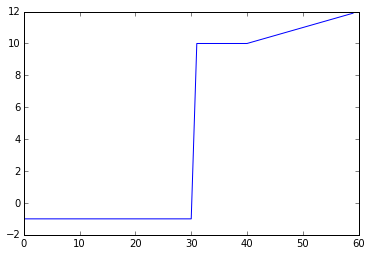

In [7]:
z.shape = (60, 100)
#imshow(z)
plot(z[:, 50])

In [8]:
water_depth = z[:, 50]
river_mouth = np.where(water_depth > 0.)[0][0]
river_mouth

31

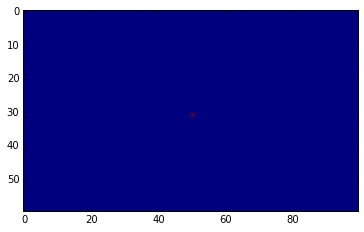

In [9]:
qs = np.zeros_like(z)
qs[river_mouth, 50] = 2000
imshow(qs)

In [11]:
w.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())

0

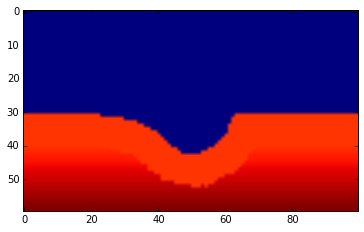

In [12]:
w.update(250.)
w.get_value('sea_water__depth', z)
imshow(z)

In [13]:
qs[river_mouth, 75] = 1000
w.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())

0

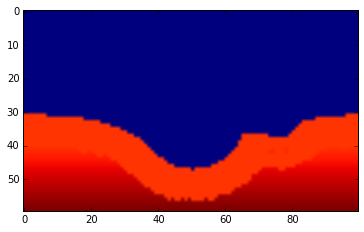

In [14]:
w.update(500.)
w.get_value('sea_water__depth', z)
imshow(z)

In [32]:
qs = np.zeros_like(z)
qs[river_mouth, (25, 75)] = 1000
w.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())

0

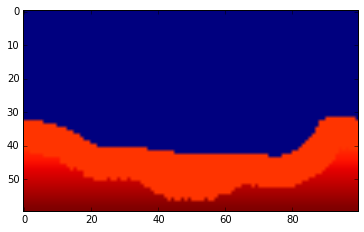

In [35]:
w.update(740.)
w.get_value('sea_water__depth', z)
imshow(z)

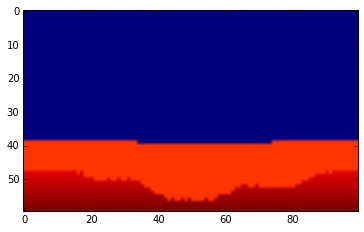

In [38]:
qs = np.zeros_like(z)
w.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())
w.update(2000)
w.get_value('sea_water__depth', z)
imshow(z)

In [39]:
qs = np.zeros_like(z)
qs[river_mouth, (25, 75)] = 1000
w.set_value('land_surface_water_sediment~bedload__mass_flow_rate', qs.flatten())

0

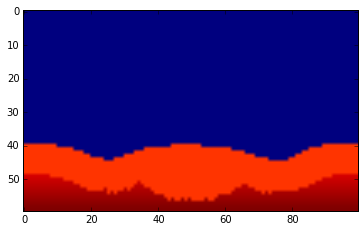

In [40]:
w.update(2250)
w.get_value('sea_water__depth', z)
imshow(z)